In [1]:
%load_ext autoreload
%autoreload 2

import math
import cmath
import numpy as np
import scipy
import sympy
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib import colors as m2colors
import seaborn as sns
from pylab import cm
import plotly
import plotly.graph_objects as go

import json
import os
import sys
import re

from MMfxns import *
from MMplotting import *
from pyDOE2 import lhs

cwd = os.getcwd()
sns.set(style="ticks", font_scale=1.5)

mcolors = dict(m2colors.BASE_COLORS, **m2colors.CSS4_COLORS)

saveall = True

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

pd.set_option('display.expand_frame_repr', False, 'display.max_columns', None)

In [65]:
#### Energy dependent alpha increase and decrease

resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
#         params['tau'] = .98
        params['tau_F'] = 24. # params['tau'] * 2
        params['tau_SG'] = 300. #params['tau'] * 150
        params['tau_SR'] = params['tau_SG']
        
        params['kc'] = 1.3 # '-stiff' # 0.98 # 'linear' # 0.5 #'soft' 1.
        params['km'] = 'stiff'      
        params['x0'] = 2.; 
        params['a0'] = 1.; params['xtt'] = 0.
        
        params['m0'] = 5.
        params['a_max'] = 50
        params['n'] = 4.
        params['resolution'] = 1.
#         params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []
        
        params['tau_R0'] = 200 # params['tau_SG'] #* 2
        params['TV0SR'] = 0.1
        params['TV0SG'] = 2.
        
        params['dynamics'] = 'exp_dynamicTS'
        params['eps'] = (0., 1., 0.0) # mean, std, magnitude
        
        params['res'] = 50
    
    return params

ins = np.array(
    [
        [24, 2.],
        [240, 20.],
        [480, 2.],
    ]
        )

params = set_params()
# params = set_params('./figures/figure4_dynamics_profiles/perm_mem_v2.png.json')
# ins = np.array(params['input_m'][0])
print(params)
resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)
mech_stats = np.abs(stiffP - stiffA) / params['m0']
params['a_c'] = params['a_c'].tolist()
print(np.amin(resultsDF['tSG']), np.mean(resultsDF['tSG']), np.amax(resultsDF['tSG']))

{'tau_F': 24.0, 'tau_SG': 300.0, 'tau_SR': 300.0, 'kc': 1.3, 'km': 'stiff', 'x0': 2.0, 'a0': 1.0, 'xtt': 0.0, 'm0': 5.0, 'a_max': 50, 'n': 4.0, 'resolution': 1.0, 'color': None, 'input_m': [], 'tau_R0': 200, 'TV0SR': 0.1, 'TV0SG': 2.0, 'dynamics': 'exp_dynamicTS', 'eps': (0.0, 1.0, 0.0), 'res': 50}
--------
a_c = 1.659320, x_c = 0.880112, m_c in absolute = 3.140401
exp_dynamicTS
priming times [240.3230148048452]
memory times [37.04979812]
mechanical ratios [3.6]
203.9478152927583 237.67593728808092 300.0


(2,)
timesteps per region: [ 24  75 165  72  19 389]
regions: [3 1 2 5 4 3]
75.10094212651413


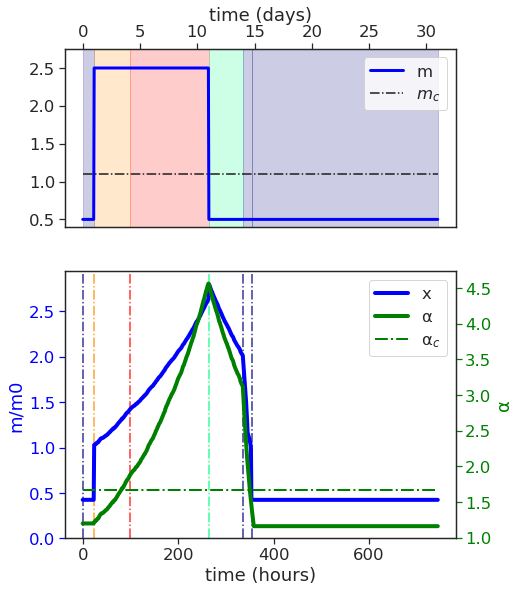

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(7,9), gridspec_kw={'height_ratios': [1., 1.5]})
# fig.suptitle('Energy Dependent \u03b1')

if 6 in pd.unique(resultsDF['active_region']) or 5 in pd.unique(resultsDF['active_region']):
#     print('blue')
    params['color'] = (0., 0., 1.)
#     params['color'] = (212/255, 0., 0.)
elif 4 in pd.unique(resultsDF2['active_region']):
#     print('red')
    params['color'] = (212/255, 0., 0.)
else:
#     print('pink')
    params['color'] = (1., 0., 1.)

print(ax.shape)
params, fig, axs = plot_profile(fig, ax, resultsDF, params, colors = 
                                      [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
                                           mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']])
#  fig2,
params['input_m'].append(ins.tolist())

saveall = False
if saveall:
    direc = os.getcwd() + '/../figures_v2/figure4_dynamics_profiles/'

    fname1 = 'profiles_' + params['dynamics'] + "_perm_mem_v2.png"
    print(fname1)
    fig.savefig(direc + fname1, format='png', dpi=600)
    
    fname2 = 'PD_' + fname1
    print(fname2)
    fig2.savefig(direc + fname2, format='png', dpi=600)
   
    with open(direc+fname1 + '.json', 'w') as f:
        f.write(json.dumps(params))

In [ ]:
#### figure 4 stiff genes
#### integrate profile DOES NOT DEPEND ON WELL DEPTH
## setting time units to hours
resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
#         params['tau'] = .98
        params['tau_F'] = 5. # params['tau'] * 2
        params['tau_SG'] = 367 #params['tau'] * 150
        params['tau_SR'] = params['tau_SG']
        
        params['kc'] = '-stiff' # 0.98 # 'linear' # 0.5 #'soft' 1.
        params['km'] = 'stiff'      
        params['x0'] = 1.; params['a0'] = 1.; params['xtt'] = 0.
        
        params['m0'] = 4.
        params['a_max'] = 50
        params['n'] = 3.5
        params['resolution'] = 1.
        params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []

        params['tau_R0'] = 200 # params['tau_SG'] #* 2
        params['TV0SR'] = 0.05
        params['TV0SG'] = 2.8
        
        params['dynamics'] = 'exp_staticTS'
        params['eps'] = (0., 1., 0.0)
        
        params['res'] = 50
    
    return params

params = set_params()
# 480 hours = 20 days
# time in hours | # stiffness
ins = np.array(
    [
        [24, 2.],
        [240, 10.],
        [500, 2.],    
    ]
        )

resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)
mech_stats = np.abs(stiffP - stiffA) / params['m0']

fig, ax = plt.subplots(2, 2, figsize=(14,9), gridspec_kw={'height_ratios': [1, .5]})
fig.suptitle('Static \u03b1')

if 6 in pd.unique(resultsDF['active_region']) or 5 in pd.unique(resultsDF['active_region']):
#     print('red')
    params['color'] = (212/255, 0., 0.)
elif 4 in pd.unique(resultsDF2['active_region']):
#     print('blue')
    params['color'] = (0., 0., 1.)
else:
#     print('pink')
    params['color'] = (1., 0., 1.)

params, fig, fig2, axs = plot_profile(fig, ax[:,0], resultsDF, params, colors = 
                                      [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
                                           mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']])

params['input_m'].append(ins.tolist())

saveall = False
if saveall:
    direc = os.getcwd() + '/../figures_v2/figure5_profile_NoEdependent/'

    fname1 = direc + "profiles_noEnergyWell_stiff_2panel_v2.png"
    print(fname1)
    fig.savefig(fname1, format='png', dpi=600)
    
    fname2 = direc + "PD_noEnergyWell_stiff_2panel_v2.png"
    print(fname2)
    fig2.savefig(fname2, format='png', dpi=600)
   
    with open(fname1 + '.json', 'w') as f:
        f.write(json.dumps(params))


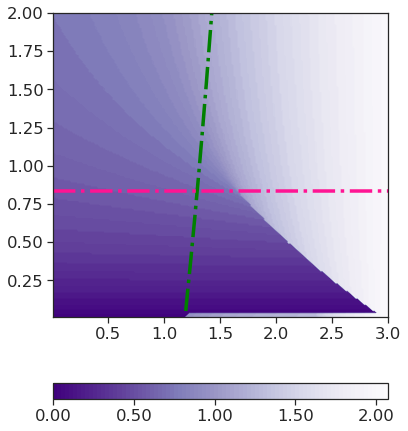

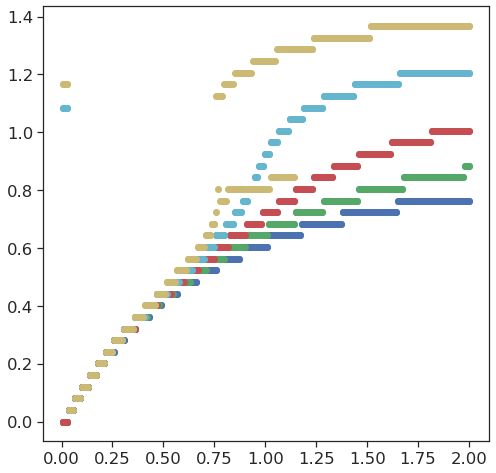

/mnt/b/research/mechanical-memory/cell-mech-memory/../figures_v2/figure4_dynamics_profiles/x_rates_overlay_phasediagram_values_v1.png


TypeError: Object of type noise is not JSON serializable

In [4]:
#### figure 4 heat map of equilibrium value of x

# params = {}
# params = set_params()

params['x_c'] = x_crit(params['n'])
res = 200
m_space = np.linspace(0.05, 12., res)
x_space = np.linspace(0, 8., res)
a_space = np.linspace(0.01, 3., res)
# ac_ind = np.where(np.abs(a_space - a_c) == np.amin(np.abs(a_space-a_c)))[0]

a_c = alpha_crit(m_space, params)
m_c = scipy.optimize.fsolve(m_crit_general, 1.5, args=(params), xtol=1e-10)[0] / params['m0']
params['a_c'] = a_c.tolist(); params['m_c'] = m_c

# x_space = np.linspace(0, 5., res)
# m_space = np.linspace(0.05,params['m_c']*3,res) * params['m0']
# a_space = np.linspace(0.01, params['a_c']*3, res)
# print(np.amax(m_space))
a_ind = np.where(np.abs(a_space - a_c) == np.amin(np.abs(a_space - a_c)))[0]

U_data = np.zeros((len(x_space), len(a_space), len(m_space)))
for mi, mm in enumerate(m_space):
    for ai, aa in enumerate(a_space):
        for xi, xx in enumerate(x_space):
            U_data[xi, ai, mi] = U(f_m, mm, xx, aa, params)

x_arr_max = np.zeros((res,res))
x_arr_min = np.zeros((res,res))
m0coords = []; m1coords = []; m2coords = []
for mi, mm in enumerate(m_space):
    for ai, aa in enumerate(a_space):
        xargs = find_peaks(-np.abs(np.diff(U_data[:,ai,mi])))[0]
        Utest = U_data[xargs,ai,mi]        
        xmins = x_space[xargs]
        
        if len(xmins) > 0:
            x_arr_max[mi, ai] = xmins[np.argmin(Utest)]
            x_arr_min[mi, ai] = np.amin(xmins) # xmins[np.argmin(Utest)]
        else:
            try:
                x_arr_max[mi, ai] = np.amax(xmins)
#                 x_arr_min[mi, ai] = np.amin(xmins)
            except:
                x_arr_max[mi, ai] = 0.
#                 x_arr_min[mi, ai] = 0.

fig, ax = plt.subplots(1,1, figsize=(6,8))

## absolute m
# cf = ax.contourf(a_space, m_space, x_arr, levels=100, cmap=cm.Purples_r)
# ylims = ax.get_ylim()
# ax.plot([params['a_c'], params['a_c']],[np.amin(m_space), params['m_c']*params['m0']*2], mcolors['green'], linewidth=3.5, linestyle='-.', label='\u03b1$_{c}$')
# ax.plot([np.amin(a_space), np.amax(a_space)], [params['m_c']*params['m0'], params['m_c']*params['m0']], mcolors['deeppink'], linewidth=3.5, linestyle='-.', lab

## m over m0
cf = ax.contourf(a_space, m_space / params['m0'], x_arr_max, levels=100, cmap=cm.Purples_r)
ylims = ax.get_ylim()
ax.plot(params['a_c'], m_space, mcolors['green'], linewidth=3.5, linestyle='-.', label='\u03b1$_{c}$')
ax.plot([np.amin(a_space), np.amax(a_space)], [params['m_c'], params['m_c']], mcolors['deeppink'], linewidth=3.5, linestyle='-.', label='m$_{c}$')

ax.set_ylim(ylims)

cb = plt.colorbar(cf, ax=ax, format='%.2f', orientation='horizontal')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

randcurves = np.floor(np.linspace(0, np.amax(a_space), 4))
randcurves = np.array([20,50,75,99])

fig3, ax3 = plt.subplots(1,1, figsize=(8,8))

colors = ['b','g','r','c','y','k']

for di, dd in enumerate(randcurves):
    
    ax3.scatter(m_space / params['m0'], x_arr_max[:,int(dd)], color=colors[di])
ax3.scatter(m_space / params['m0'], x_arr_max[:,a_ind], color=colors[di+1])

for di, dd in enumerate(randcurves):
    
    ax3.scatter(m_space / params['m0'], x_arr_min[:,int(dd)], color=colors[di])
ax3.scatter(m_space / params['m0'], x_arr_min[:,a_ind], color=colors[di+1])


plt.show()


# fig2, ax2 = plt.subplots(1,1, figsize=(6,6))
# baseline = f_m(m_space, params)
# cf2 = ax2.contourf(a_space, m_space, x_arr_max - baseline[:,np.newaxis], levels=100, cmap=cm.Purples_r)
# plt.colorbar(cf, ax=ax2)

saveall = True
if saveall:
    direc = os.getcwd() + '/../figures_v2/figure4_dynamics_profiles/'

    fname1 = direc + "x_rates_overlay_phasediagram_values_v1.png"
    print(fname1)
    fig.tight_layout()
    fig.savefig(fname1, format='png', dpi=600)
    
    with open(fname1 + '.json', 'w') as f:
        f.write(json.dumps(params))


In [ ]:
# %%capture
import multiprocessing as mp
import timeit
def run_sim(ins, params, trials):
    
    memout = []
#     params = deepcopy(params)
    for pi in np.arange(len(trials)):

        resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
        resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)
        memout.append(memory_times)
        
    return memout

ptime = 24

ins = np.array(
    [
        [24, 2.],
        [ptime, 10.], #320
        [480, 2.],
    ]
        )

params = {}
params = set_params()
print(params)
# params['input_m'].append(ins.tolist())
start = timeit.default_timer()

numtrials = np.arange(128)

memappend = [];

# for ni, nn in enumerate(numtrials):
#     params = set_params()
#     out = run_sim(ins, params)
#     print(out)
#     memappend.append(out)

print(memappend)
n_proc = mp.cpu_count() # // 2
chunksize = len(numtrials) // n_proc
proc_chunks = []
for i_proc in range(n_proc):
    chunkstart = i_proc * chunksize
    # make sure to include the division remainder for the last process
    chunkend = (i_proc + 1) * chunksize if i_proc < n_proc - 1 else None

    proc_chunks.append(numtrials[chunkstart:chunkend])

# assert sum(map(len, proc_chunks)) == len(outputDF)
# print(proc_chunks)
with mp.Pool(processes=n_proc) as pool:

    proc_results = [pool.apply_async(run_sim, args=(ins, params, chunk,)) for chunk in proc_chunks]

    # blocks until all results are fetched
    result_chunks = [r.get() for r in proc_results]

results = [item for sublist in result_chunks for item in sublist]
results = np.array([i[0] for i in results])

# print(results)

np.save('./noise_results_rates/'+str(ptime)+'.N'+str(np.amax(numtrials))+'.npy', results)
with open('./noise_results_rates/'+str(ptime)+'.N'+str(np.amax(numtrials))+'.json', 'w') as f:
    f.write(json.dumps(params))

end = timeit.default_timer()
# print((end - start)/3600, end = ' '); print(' hours')